# Property Price Predection

I am starting this project as i am reading the book 'Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow' by Aurélien Géron so most of the code are going to be simmilar to the book.

In [2]:
# ==========================================
# SECTION 1: SYSTEM REQUIREMENTS & COMPATIBILITY
# ==========================================

# Import the sys module to interact with the Python interpreter
import sys

# 'assert' acts as a safety gate. If the condition is False, the code stops.
# This ensures we aren't using an outdated version of Python (pre-3.5).
assert sys.version_info >= (3, 5)

# Import Scikit-Learn (the primary machine learning library)
import sklearn

# Ensure Scikit-Learn is version 0.20 or higher.
# Older versions have different function names and will cause errors later.
assert sklearn.__version__ >= "0.20"


# ==========================================
# SECTION 2: UTILITY IMPORTS
# ==========================================

# NumPy is the fundamental package for scientific computing/math in Python
import numpy as np

# 'os' allows us to interact with the operating system (creating folders, etc.)
import os


# ==========================================
# SECTION 3: PLOTTING & VISUALIZATION SETUP
# ==========================================

# This 'magic command' tells Jupyter to display plots directly below the code cell
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

# 'rc' stands for 'Run Commands'. This sets GLOBAL styles for all plots.
# We increase label sizes so the charts are readable in reports/presentations.
mpl.rc('axes', labelsize=14)  # Font size for X and Y axis titles
mpl.rc('xtick', labelsize=12) # Font size for X-axis numbers/labels
mpl.rc('ytick', labelsize=12) # Font size for Y-axis numbers/labels


# ==========================================
# SECTION 4: FILE ARCHITECTURE
# ==========================================

# Define the "Root" or home directory for the project (current folder)
PROJECT_ROOT_DIR = "."

# Name of the specific project/chapter (used for folder naming)
CHAPTER_ID = "List of Figures"

# Join the paths together: ./images/end_to_end_project/
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

# Create the folder on your hard drive. 
# 'exist_ok=True' means "if the folder is already there, don't crash."
os.makedirs(IMAGES_PATH, exist_ok=True)


# ==========================================
# SECTION 5: THE SAVING HELPER FUNCTION
# ==========================================

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """
    A helper function to save your charts as high-quality image files.
    - fig_id: The name you want to give the file (e.g., "price_histogram")
    - tight_layout: Automatically adjusts subplots to fit in the figure area
    - fig_extension: Format (png, pdf, svg, etc.)
    - resolution: DPI (Dots Per Inch). 300 is professional print quality.
    """
    # Create the full file path (Folder + Filename + Extension)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    
    print("Saving figure", fig_id)
    
    # tight_layout prevents labels from being cut off at the edges
    if tight_layout:
        plt.tight_layout()
        
    # Saves the actual file to your hard drive
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the data

In [18]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [19]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [20]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [21]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [22]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


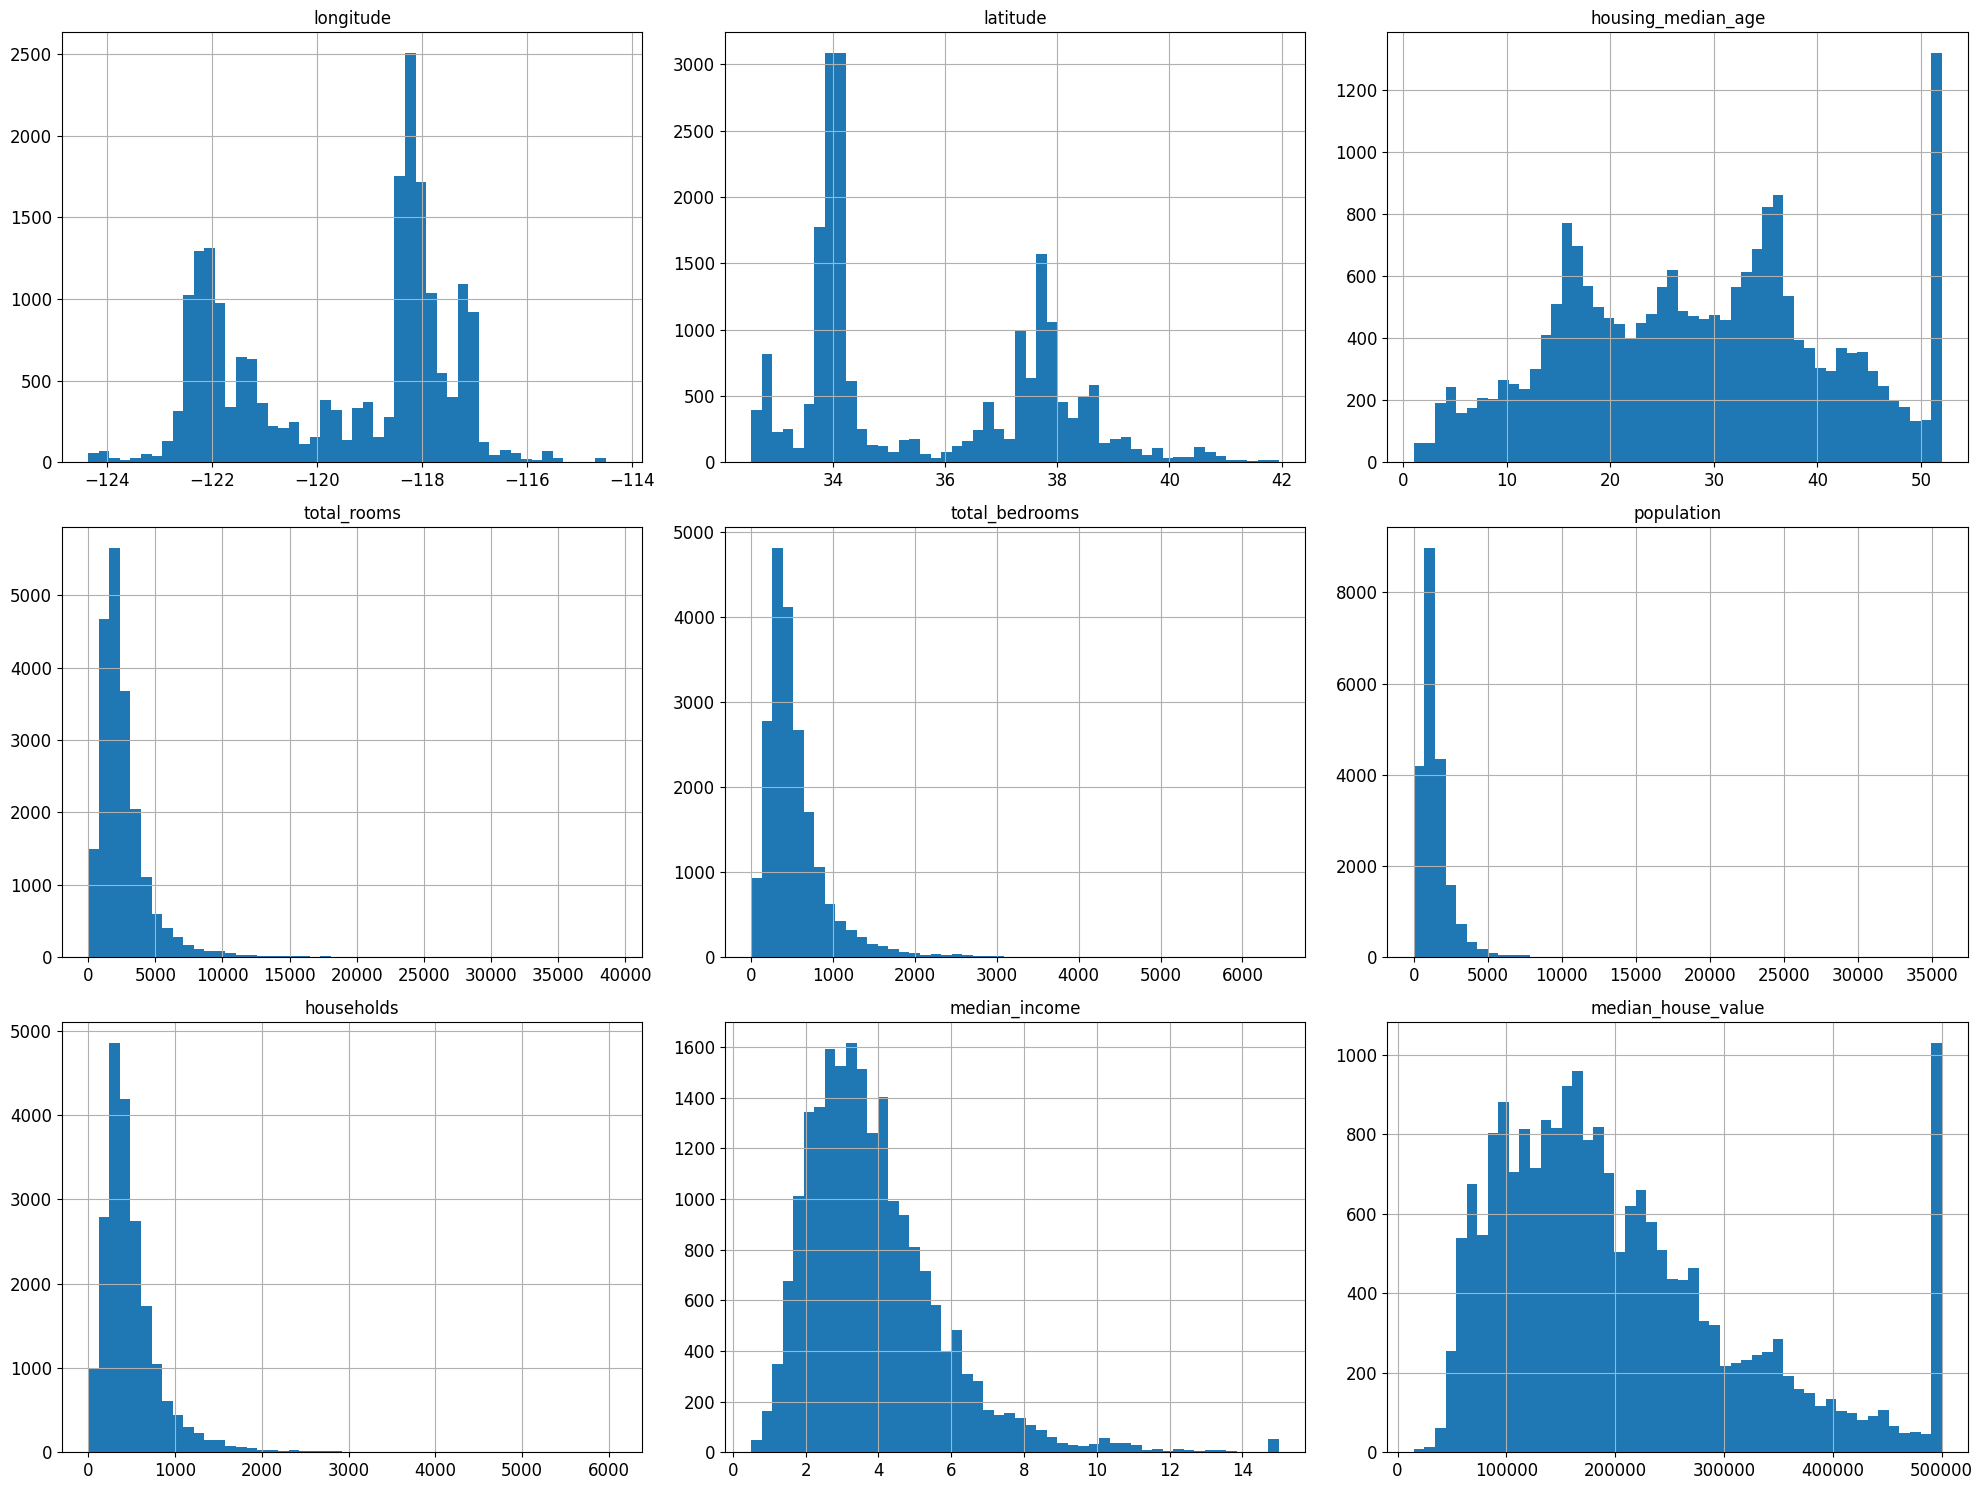

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

# Create a Test Set

In [28]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

The test_set_check and split_train_test_by_id functions use hashing to ensure the training and test sets remain identical across every run, even if you update the dataset.

This prevents Data Snooping Bias by ensuring the model never "peeks" at the same house in the test set that it previously studied in the training set.

Use this method if the dataset is changing.

In [31]:

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [32]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY,-122222.16
10,10,-122.26,37.85,52,2202,434.0,910,402,3.2031,281500,NEAR BAY,-122222.15
11,11,-122.26,37.85,52,3503,752.0,1504,734,3.2705,241800,NEAR BAY,-122222.15
12,12,-122.26,37.85,52,2491,474.0,1098,468,3.0750,213500,NEAR BAY,-122222.15
13,13,-122.26,37.84,52,696,191.0,345,174,2.6736,191300,NEAR BAY,-122222.16


In [39]:
from sklearn.model_selection import train_test_split
# Use this method if the dataset is constant.
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [40]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
20046,-119.01,36.06,25,1505,NaN,1392,359,1.6812,47700,INLAND,2
3024,-119.46,35.14,30,2943,NaN,1565,584,2.5313,45800,INLAND,2
15663,-122.44,37.80,52,3830,NaN,1310,963,3.4801,500001,NEAR BAY,3
20484,-118.72,34.28,17,3051,NaN,1705,495,5.7376,218600,<1H OCEAN,4
9814,-121.93,36.62,34,2351,NaN,1063,428,3.7250,278000,NEAR OCEAN,3


<Axes: >

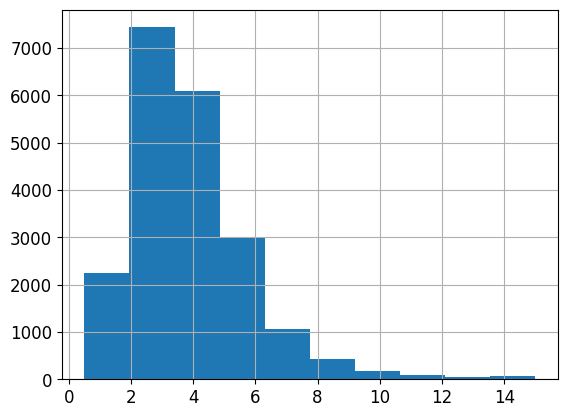

In [35]:
housing["median_income"].hist()

In [36]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [37]:
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

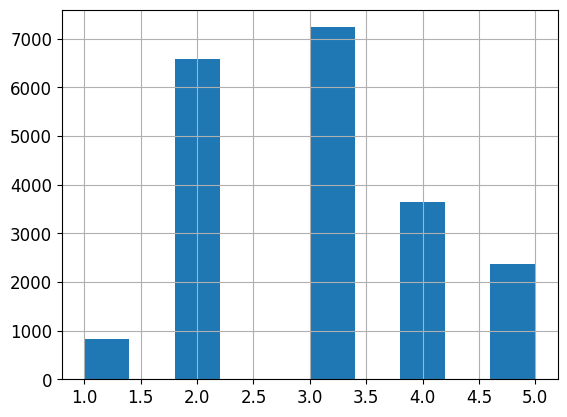

In [38]:
housing["income_cat"].hist()

In [43]:
from sklearn.model_selection import StratifiedShuffleSplit

split_obj = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split_obj.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

### Comparing if the data are evenly distrubuted or not.

In [44]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [45]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [48]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [51]:
#Sampling bias comparison of stratified versus purely random sampling
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [53]:
# ###remove the income_cat attribute so the data is back to its original state
#for set_ in (strat_train_set, strat_test_set):
    #set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [65]:
housing = strat_train_set.copy()

# Visualizing Geographical Data

Saving figure better_visualization_plot


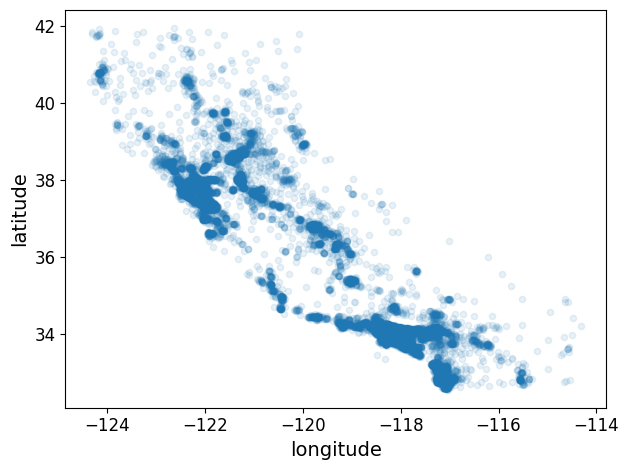

In [55]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

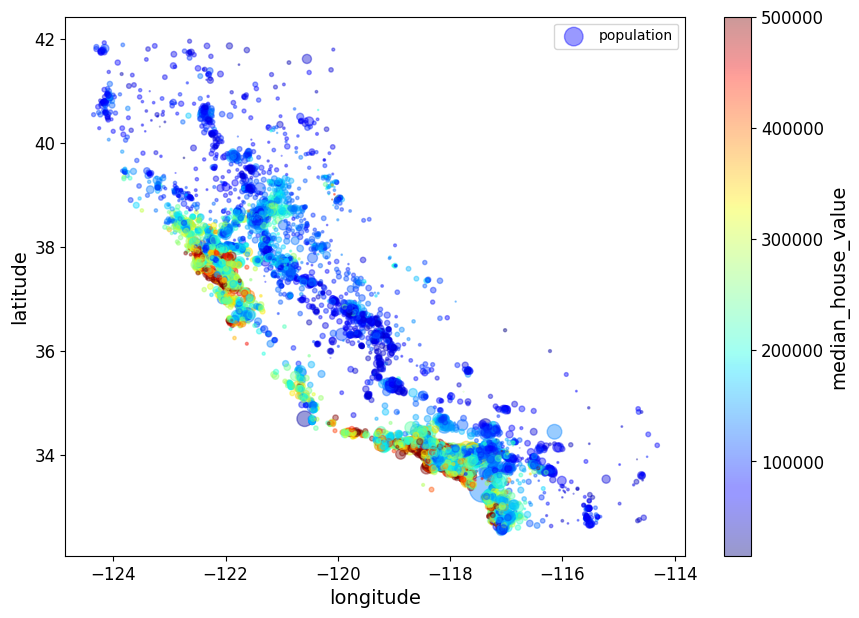

In [60]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
#save_fig("housing_prices_scatterplot")

In [61]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x191a74482f0>)

Saving figure california_housing_prices_plot


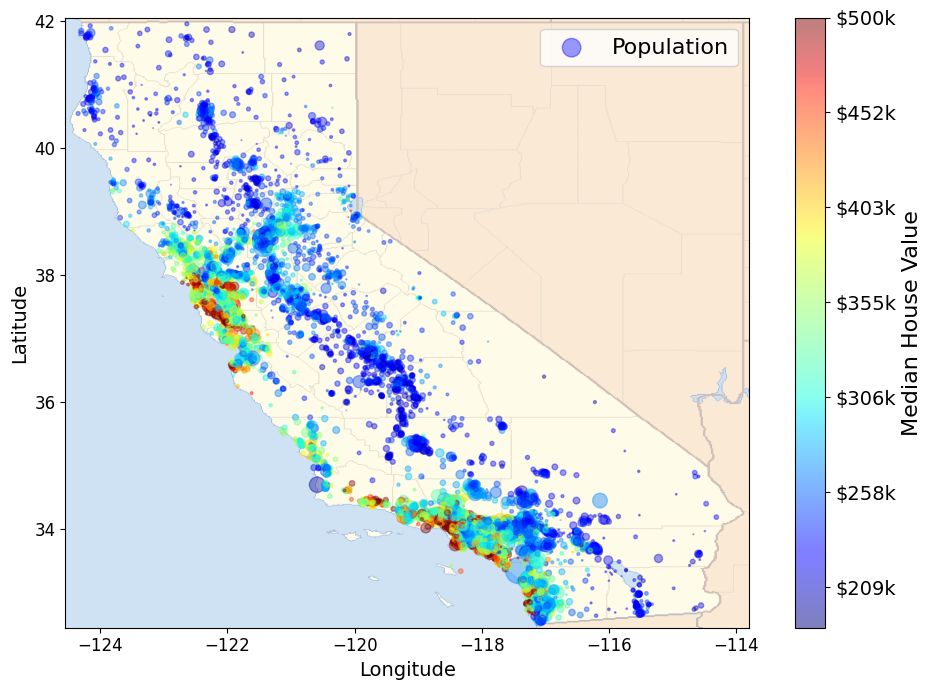

In [62]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

# Step 4 Looking for correlation

In [66]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736,72100,INLAND
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373,279600,NEAR OCEAN
2908,-119.04,35.37,44,1618,310.0,667,300,2.8750,82700,INLAND
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264,112500,NEAR OCEAN
20496,-118.70,34.28,27,3536,646.0,1837,580,4.4964,238300,<1H OCEAN


In [68]:
corr_matrix = housing.corr(numeric_only=True)

In [70]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64